# String rewriting

This is the attempt to implement a string rewriting system.
It accepts an input string built of a set of characters and one or more replacement rules and builds a tree by applying each matching rule to produce a child.
I also attempt to follow a trajectory of a single string, as well as analyze distances between the items of the string family.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def find_children(inp, rules):
    """finds all the possible results of the ruleset applied to a given string"""
    children = set()
    for r_from, r_to in rules.items():
        for i in range(len(inp) - len(r_from) + 1):
            if inp[i:i+len(r_from)] == r_from:
                children.add(inp[:i] + r_to + inp[i+len(r_from):])
    return children

In [3]:
def print_world(world):
    """just prints the world tree"""
    if len(world) > 0: print('-' * 102)
    for k, v in world.items():
        if len(v['parents']) > 0: 
            print('[' + ' '.join(s for s in v['parents']).center(100) + ']')
        print('[' + ('> ' + k + ' <').center(100)+ ']')
        if len(v['children']) > 0: 
            print('[' + ' '.join(s for s in v['children']).center(100) + ']')
        print('-' * 102)

In [4]:
def symmetrize(rules):
    """if rules is a Dict, it appends the reversed entries (value:key for each item)"""
    rules_out = rules.copy()
    for k, v in rules.items():
        rules_out[v] = k
    return rules_out

In [5]:
# rules = symmetrize({'10': '01'})
# rules = symmetrize({'10': '01', '11': '11'})
rules = {'10': '01', '011': '110', '0111': '1110', '01111': '11110', '011111': '111110', '0111111': '1111110'}
# rules = {'10': '01', '011': '110', '111': '111'}
# rules = {'100': '010', '001': '010'}
# rules = {'10': '01', '02': '20', '12': '33', '33': '21'}

inp = ''.join(random.choices(['0','0','0','0','1'], k=18))
inp = '000100000000100001000000'

def rules2fn(rules):
    return "_".join([ "{}x{}".format(k,v) for k,v in rules.items()])

def rules2str(rules):
    return "\n".join([ "{} \u2192 {}".format(k,v) for k,v in rules.items()])

modelname = rules2fn(rules) + '_' + inp
modeltitle = rules2str(rules) + '\n' + inp
print(modeltitle)

10 → 01
011 → 110
0111 → 1110
01111 → 11110
011111 → 111110
0111111 → 1111110
000100000000100001000000


## Replacement tree

2024


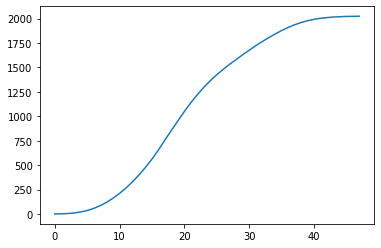

In [6]:
l = []
world = {}

while True:
    changed = False
    
    if len(world) > 0:
        all_children = set(c for val in world.values() for c in val['children'])
    else:
        all_children = set([inp])
        
    l.append(len(world))

    for c in all_children:
        if c not in world:
            children_of_c = set(find_children(c, rules))
            world[c] = dict(children=children_of_c, parents=set())
            changed = True

    if not changed: break
plt.plot(l)
print(len(world))

The syntax of the output is as follows:

```
  parent parent
    > item <
child child child
```

In [7]:
for parent, val in world.items():
    for child in val['children']:
        if child in world: 
            if parent not in world[child]['parents']: 
                world[child]['parents'].add(parent)
print('rules:')
print(rules2str(rules))
print('init: ' + inp)
print_world(world)   

rules:
10 → 01
011 → 110
0111 → 1110
01111 → 11110
011111 → 111110
0111111 → 1111110
init: 000100000000100001000000
------------------------------------------------------------------------------------------------------
[             000100000001000001000000 000100000000100010000000 001000000000100001000000             ]
[                                    > 000100000000100001000000 <                                    ]
[             000100000000100000100000 000010000000100001000000 000100000000010001000000             ]
------------------------------------------------------------------------------------------------------
[             000100000001000000100000 001000000000100000100000 000100000000100001000000             ]
[                                    > 000100000000100000100000 <                                    ]
[             000100000000100000010000 000010000000100000100000 000100000000010000100000             ]
------------------------------------------------------------

[                                    > 000000010000000000100010 <                                    ]
[             000000001000000000100010 000000010000000000100001 000000010000000000010010             ]
------------------------------------------------------------------------------------------------------
[             000000000000100010100000 000000000000010011000000 000000000000010100100000             ]
[                                    > 000000000000010010100000 <                                    ]
[             000000000000001010100000 000000000000010001100000 000000000000010010010000             ]
------------------------------------------------------------------------------------------------------
[             000000000100110000000000 000000000101001000000000 000000001000101000000000             ]
[                                    > 000000000100101000000000 <                                    ]
[             000000000010101000000000 000000000100011000000000 000000000

[             000000000110001000000000 000000001100010000000000 000000000101010000000000             ]
------------------------------------------------------------------------------------------------------
[             000000000001000100000001 000000000010000010000001 000000000001000010000010             ]
[                                    > 000000000001000010000001 <                                    ]
[                         000000000001000001000001 000000000000100010000001                          ]
------------------------------------------------------------------------------------------------------
[             000010100100000000000000 000100100010000000000000 000011000010000000000000             ]
[                                    > 000010100010000000000000 <                                    ]
[             000010010010000000000000 000001100010000000000000 000010100001000000000000             ]
-------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
[             000100010000001000000000 000100100000000100000000 001000010000000100000000             ]
[                                    > 000100010000000100000000 <                                    ]
[             000100010000000010000000 000100001000000100000000 000010010000000100000000             ]
------------------------------------------------------------------------------------------------------
[             000000000001100010000000 000000000101000010000000 000000000011000100000000             ]
[                                    > 000000000011000010000000 <                                    ]
[             000000000110000010000000 000000000011000001000000 000000000010100010000000             ]
------------------------------------------------------------------------------------------------------
[             001100010000000000000000 001010100000000000000000 010010010

------------------------------------------------------------------------------------------------------
[             001100000000000000000010 010010000000000000000010 001010000000000000000100             ]
[                                    > 001010000000000000000010 <                                    ]
[             001001000000000000000010 001010000000000000000001 000110000000000000000010             ]
------------------------------------------------------------------------------------------------------
[             101000000000000000000010 011000000000000000000100 001100000000000000000010             ]
[                                    > 011000000000000000000010 <                                    ]
[             010100000000000000000010 011000000000000000000001 110000000000000000000010             ]
------------------------------------------------------------------------------------------------------
[             001000010000000000100000 010000001000000000100000 001000001

------------------------------------------------------------------------------------------------------
[             101000000000000100000000 011000000000001000000000 001100000000000100000000             ]
[                                    > 011000000000000100000000 <                                    ]
[             011000000000000010000000 110000000000000100000000 010100000000000100000000             ]
------------------------------------------------------------------------------------------------------
[             001000000010000000001000 010000000001000000001000 001000000001000000010000             ]
[                                    > 001000000001000000001000 <                                    ]
[             001000000001000000000100 000100000001000000001000 001000000000100000001000             ]
------------------------------------------------------------------------------------------------------
[             000000000000000001001010 000000000000000000101100 000000000

[                                    > 010000000011000000000000 <                                    ]
[             010000000010100000000000 010000000110000000000000 001000000011000000000000             ]
------------------------------------------------------------------------------------------------------
[                         100000000001000000010000 100000000000100000100000                          ]
[                                    > 100000000000100000010000 <                                    ]
[             100000000000010000010000 010000000000100000010000 100000000000100000001000             ]
------------------------------------------------------------------------------------------------------
[             010000000001000000000100 100000000001000000000010 010000000010000000000010             ]
[                                    > 010000000001000000000010 <                                    ]
[             010000000000100000000010 001000000001000000000010 010000000

## Processing the results

Compute a random trajectory and return as a list.

In [8]:
def random_trajectory(k, n, world):
    assert k in world
    traj = []
    
    for i in range(n):
        traj.append(k)
        children = list(world[k]['children'])
        if len(children) == 0: return traj
        k = random.choice(children)
    
    return traj

Now attempt to generate multiple trajectories and display them as a picture.

In [9]:
def worldline_to_array(worldline):
    return np.array([ [int(s) for s in w] for w in worldline])

We define the distance between two points as number of rewritings needed to get from a to b (or b to a but negative).

In [10]:
def distance(a, b, world):
    assert a in world
    assert b in world
    
    team_a, team_b = set([a]), set([b])

    d = 0
    stalled = False
    
    for i in range(len(world)):
        
        if b in team_a: return +d
        if a in team_b: return -d
        
        d = d + 1

        team_next_a = team_a.copy()
        team_next_b = team_b.copy()

        for t in team_a: 
            for c in world[t]['children']: 
                team_next_a.add(c)
                    
        for t in team_b: 
            for c in world[t]['children']: 
                team_next_b.add(c)
                    
        stalled = (team_a == team_next_a) and (team_b == team_next_b)
        if stalled: print('stalled at {} between {} and {}'.format(d, a, b))

        team_a = team_next_a
        team_b = team_next_b

In [11]:
def distances_dict(world): 
    return {k1: {k2: distance(k1, k2, world) for k2 in world.keys()} for k1 in world.keys()}

Compute the distance in a matrix.

In [12]:
def correl(W, world):
    d = np.ndarray((len(W), len(W)))

    for i in range(len(W)):
        for j in range(len(W)):
            d[i,j] = distance(W[i], W[j], world)
            
    return d

Here we compute the distance matrix following a random trajectory.

In [13]:
ntraj = 1

In [14]:
W = random_trajectory(inp, 200, world)

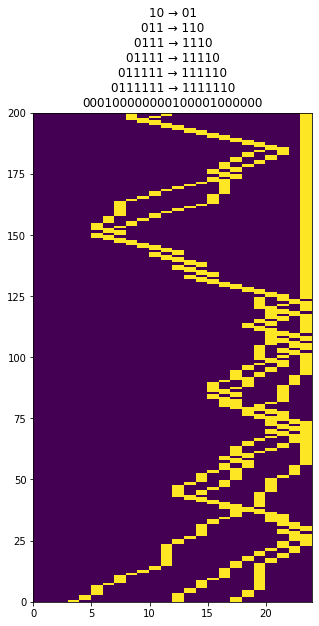

In [15]:
plt.figure(figsize=(5,9))
plt.pcolor(worldline_to_array(W))
plt.title(modeltitle)
plt.savefig('{}_tj_{}.png'.format(modelname, ntraj))

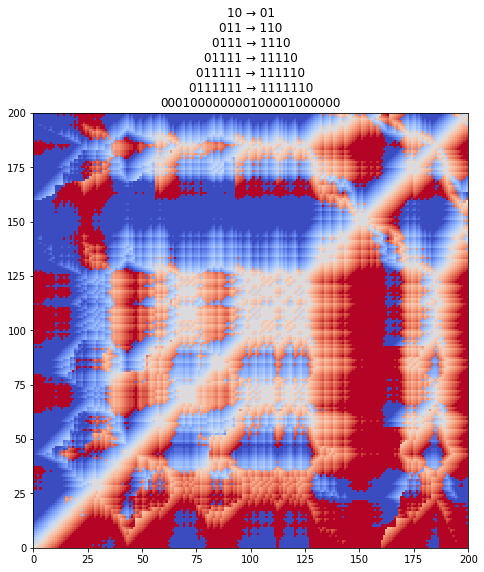

In [16]:
d = correl(W, world)

plt.figure(figsize=(8,8))  

plt.title(modeltitle)
plt.pcolor(d, cmap='coolwarm', vmin=-12, vmax=12)
plt.gca().set_aspect(1)
plt.savefig('{}_mx_{}.png'.format(modelname, ntraj))

In [17]:
ntraj += 1

In [18]:
# W = list(world.keys())
# d = correl(W, world)

# plt.figure(figsize=(8,8))  

# plt.title(modeltitle)
# plt.pcolor(d, cmap='coolwarm', vmin=-16, vmax=16)
# plt.gca().set_aspect(1)
# plt.savefig(modelname + '.png')

Find the local dimensionality of the world by how fast the volume changes with the distance.

In [19]:
# W = world.keys()

# dists = range(0, len(inp) * 2)
# histo_cumul = np.zeros(len(dists))
# print(''.rjust(12), ' '.join(['{:3}'.format(x) for x in dists]))

# for w1 in W:
#     dist = np.array([distance(w1, w2, world) for w2 in W])
#     histo = np.array([np.sum(np.where(dist == d, 1, 0)) for d in dists])
#     plt.plot(dists,histo)
#     histo_cumul += histo
#     print(w1.rjust(12), ' '.join(['{:3}'.format(x) for x in histo]))

# print('AVG'.rjust(12), ' '.join(['{:3.1f}'.format(x) for x in histo_cumul / len(W)]))

# plt.plot(range(len(histo_cumul)), histo_cumul / len(W), 'o-', c='k')
# plt.title(modeltitle)
# plt.savefig(modelname + '_dist.png')